In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Intrinsic NumPy Array Creation
NumPy has built-in functions for creating arrays from scratch:
zeros(shape) will create an array filled with 0 values with the specified shape. The default dtype is float64.

In [2]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

arange() will create arrays with regularly incrementing values. A data type can be added to ensure the type needed.

In [3]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [4]:
np.arange(2, 10, dtype=float)

array([2., 3., 4., 5., 6., 7., 8., 9.])

Using a third parameter we can set the numbers in the array to a certain number of decimal places.

In [5]:
np.arange(2, 3, 0.1)

array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9])

reshape() will create a 2D array with the number of rows and columns specified but the number in the arrange() function must be a common multiple of the two numbers

In [6]:
np.arange(15).reshape(3, 5)

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

indices() will create a set of arrays (stacked as a one-higher dimensioned array), one per dimension with each representing variation in that dimension.

In [7]:
np.indices((3,3))

array([[[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]],

       [[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]])

(array([1013.,  989.,  998., 1004., 1004., 1047.,  963., 1017.,  941.,
        1024.]),
 array([2.10857442e-04, 1.00016814e+00, 2.00012543e+00, 3.00008271e+00,
        4.00004000e+00, 4.99999728e+00, 5.99995457e+00, 6.99991185e+00,
        7.99986914e+00, 8.99982642e+00, 9.99978371e+00]),
 <a list of 10 Patch objects>)

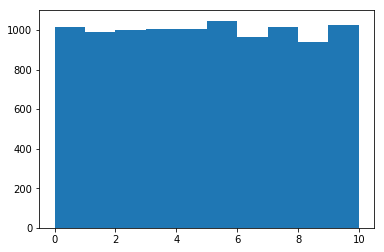

In [8]:
x = np.random.uniform(0.0,10.0, 10000)
plt.hist(x)

(array([9.000e+00, 1.090e+02, 6.290e+02, 2.177e+03, 3.258e+03, 2.590e+03,
        9.990e+02, 2.050e+02, 2.300e+01, 1.000e+00]),
 array([1.04935968, 1.90193608, 2.75451249, 3.60708889, 4.45966529,
        5.31224169, 6.16481809, 7.0173945 , 7.8699709 , 8.7225473 ,
        9.5751237 ]),
 <a list of 10 Patch objects>)

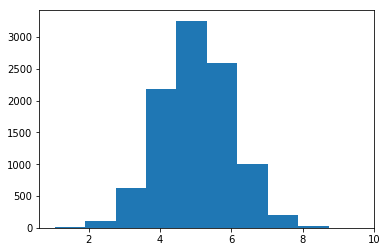

In [9]:
x = np.random.normal(5.0, 1.0, 10000)
plt.hist(x)